<a href="https://colab.research.google.com/github/subah2004/Handwritten-digits-recognition-/blob/Pramod-Katchalla/not_a_good_pred_ml%3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow import keras

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255 #Normalisation

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('training data: ', x_train.shape)
print('testing data: ', x_test.shape)

training data:  (60000, 28, 28)
testing data:  (10000, 28, 28)


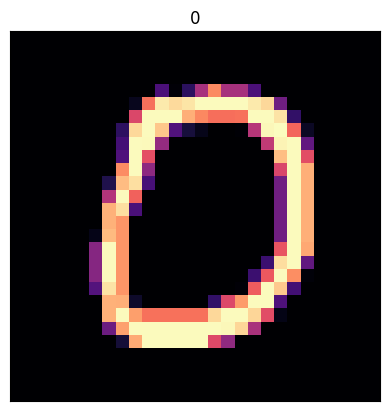

In [ ]:
plt.imshow(x_test[10], cmap = 'magma')
plt.title(y_test[10])
plt.tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model.compile(loss=loss, metrics=metric, optimizer=optimiser)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# print('Model compiled')

In [ ]:
# epochs = 5
# batch = 50
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6, shuffle = True)
# history = model.fit(x_train, y_train,
#                     batch_size=batch,
#                     epochs=epochs,
#                     shuffle=True,
#                     verbose=1)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8804 - loss: 0.4240 - val_accuracy: 0.9624 - val_loss: 0.1260
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9652 - loss: 0.1151 - val_accuracy: 0.9718 - val_loss: 0.0935
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9785 - loss: 0.0733 - val_accuracy: 0.9713 - val_loss: 0.0891
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9842 - loss: 0.0528 - val_accuracy: 0.9776 - val_loss: 0.0738
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9877 - loss: 0.0406 - val_accuracy: 0.9776 - val_loss: 0.0730
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9902 - loss: 0.0294 - val_accuracy: 0.9795 - val_loss: 0.0684


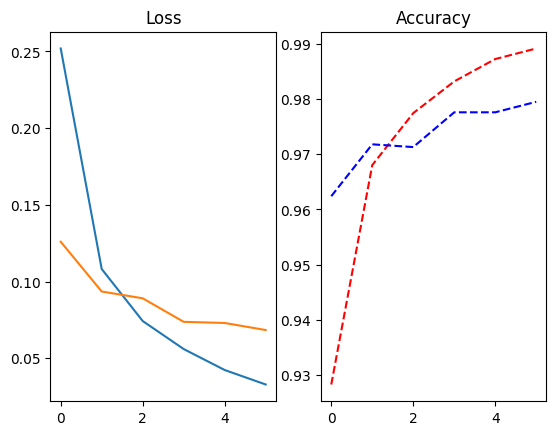

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].title.set_text('Loss')

ax[1].plot(history.history['accuracy'], 'r--')
ax[1].plot(history.history['val_accuracy'], 'b--')
ax[1].title.set_text('Accuracy')

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print('Loss')
print(loss)
print('Accuracy')
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.0838
Loss
0.06843671947717667
Accuracy
0.9794999957084656


In [ ]:
start = 100
end = 150

predictions = model.predict(x_test[start:end])

for i in range(len(predictions)):
    print(f'predicted value is {np.argmax(predictions[i])} and actual val is {y_test[i+start]}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
predicted value is 6 and actual val is 6
predicted value is 0 and actual val is 0
predicted value is 5 and actual val is 5
predicted value is 4 and actual val is 4
predicted value is 9 and actual val is 9
predicted value is 9 and actual val is 9
predicted value is 2 and actual val is 2
predicted value is 1 and actual val is 1
predicted value is 9 and actual val is 9
predicted value is 4 and actual val is 4
predicted value is 8 and actual val is 8
predicted value is 7 and actual val is 7
predicted value is 3 and actual val is 3
predicted value is 9 and actual val is 9
predicted value is 7 and actual val is 7
predicted value is 4 and actual val is 4
predicted value is 4 and actual val is 4
predicted value is 4 and actual val is 4
predicted value is 9 and actual val is 9
predicted value is 2 and actual val is 2
predicted value is 5 and actual val is 5
predicted value is 4 and actual val is 4
predicted value is 7 and actual val is 7
predicted value is 

In [ ]:
import gradio as gr
import cv2

ModuleNotFoundError: No module named 'gradio'

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
!pip install opencv-python


In [ ]:
import gradio as gr
import cv2

In [ ]:
def classify(image):
    image = image['layers'][0]
    print('original',image.shape)

    image = cv2.resize(image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
    image = image[:,:,3]  / 255
    image = np.expand_dims(image, 0)

    prediction = model.predict(image)
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

# height=28, width=28
sketchpad = gr.Sketchpad()
label = gr.Label(num_top_classes=10)
interface = gr.Interface(classify, sketchpad, label, live=True, theme=gr.themes.Monochrome())
interface.launch();

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://66de1e0eda59bdc149.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
model.predict(np.expand_dims(x_test[0], 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[3.9457993e-07, 1.2862357e-09, 1.1383807e-05, 2.8195503e-04,
        2.8012558e-11, 2.3236850e-09, 1.1055058e-13, 9.9954826e-01,
        1.1512613e-07, 1.5788393e-04]], dtype=float32)